In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from time import strptime
import datetime
from datetime import datetime
import warnings
import time
import csv
import glob
import logging
import importlib
import json
from tabulate import tabulate
import networkx as nx
import seaborn as sns
import re
from operator import itemgetter
import matplotlib.cm as mcm
import community
from community import community_louvain as cm
import leidenalg as la
import igraph as ig
from cdlib import algorithms
warnings.filterwarnings('ignore')
path = "C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/network/"
%autosave 3600

Autosaving every 3600 seconds


# Indice

- [Functions](#func)

- [Network Community 1](#comm_1)

- [Network Community 2](#comm_2)

- [Network Community 5](#comm_5)

- [Network Community 19](#comm_19)


### Functions
<a id ="func"/>

In [25]:
def clean_data_format(df: pd.DataFrame, broken_col='name', fix_encoding=False):
    col = df.columns[-1]

    def clean(target):
        return str(target).replace("\r", "")

    if "\r" in col:
        clean_col = clean(col)
        df = df.rename(columns={col: clean_col})
        if df[clean_col].dtype.name == 'object':
            df[clean_col] = df[clean_col].apply(clean)
    if fix_encoding:
        df[broken_col] = df[broken_col].apply(util.fix_encoding)
    return df

In [15]:
def network_general(df, col_1="name", col_2="rt_name"):
    retweets_graph = nx.from_pandas_edgelist(df, col_1 ,col_2 , create_using=nx.DiGraph())
    info = nx.info(retweets_graph)
    
    degree_dict = dict(retweets_graph.degree(retweets_graph.nodes()))
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    
    in_degree_dict = dict(retweets_graph.in_degree(retweets_graph.nodes()))
    sorted_in_degree = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True)
    
    out_degree_dict = dict(retweets_graph.out_degree(retweets_graph.nodes()))
    sorted_out_degree = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True)
    
    return {"info": info, "degree": sorted_degree, "in_degree": sorted_in_degree,  
            "out_degree": sorted_out_degree}

In [16]:
def network_louvain(df, col_1="name", col_2="rt_name"):
    retweets_graph_und = nx.from_pandas_edgelist(df, col_1, col_2)
    info = nx.info(retweets_graph_und)
    
    best_part = cm.best_partition(retweets_graph_und, random_state=42)
    
    return {"info": info, "best_part": best_part}

In [14]:
# df_1 = pd.read_csv(path + "_1.csv", lineterminator="\n", low_memory=False)
# df_1 = clean_data_format(df_1)
# df_2 = pd.read_csv(path + "_2.csv", lineterminator="\n", low_memory=False)
# df_2 = clean_data_format(df_2)
# df_5 = pd.read_csv(path + "_5.csv", lineterminator="\n", low_memory=False)
# df_5 = clean_data_format(df_5)
# df_19 = pd.read_csv(path + "_19.csv", lineterminator="\n", low_memory=False)
# df_19 = clean_data_format(df_19)

In [5]:
# n = 0
# value = ["1", "2", "5", "19"]
# dfs = [df_1, df_2, df_5, df_19]
# for i in range(len(value)):
#     nt = pd.DataFrame()
#     print(f"Process {value[i]}")
#     for chunk in pd.read_csv(path + "user_rtuser.csv", lineterminator="\n", 
#                              low_memory=False, chunksize=int(1e6)):
#         chunk = clean_data_format(chunk, "rt_name")
#         nt = nt.append(chunk[chunk["name"].isin(dfs[i]["name"]) | chunk["rt_name"].isin(dfs[i]["name"])])
#     nt = nt.reset_index(drop=True)
#     nt.to_csv(path + f"nt_{value[i]}.csv", line_terminator='\n', encoding='utf-8', index=False)

### Network Community 1
<a id="comm_1"/>
<p>

    Community Americana con tendenza politica / giornalistica
    - contiene 4 Good Dozen (DrDenaGrayson, ashishkjha, edyong209, HelenBranswell)
    - contiene utenti che retwettano i Good Dozen

</p>

In [ ]:
nt_1 = pd.read_csv(path + "nt_1.csv", low_memory=False, lineterminator='\n')

#### Info

#### Louvain

#### Communities

### Network Community 2

In [17]:
nt_2 = pd.read_csv(path + "nt_2.csv", low_memory=False, lineterminator='\n')
out_2 = network_general(nt_2)
out_2_louvain = network_louvain(nt_2)

#### Info

In [53]:
print(out_2['info'])

Name: 
Type: DiGraph
Number of nodes: 307720
Number of edges: 698176
Average in degree:   2.2689
Average out degree:   2.2689


#### Louvain

In [50]:
print(out_2_louvain["info"])

Name: 
Type: Graph
Number of nodes: 307720
Number of edges: 697677
Average degree:   4.5345


#### Communities

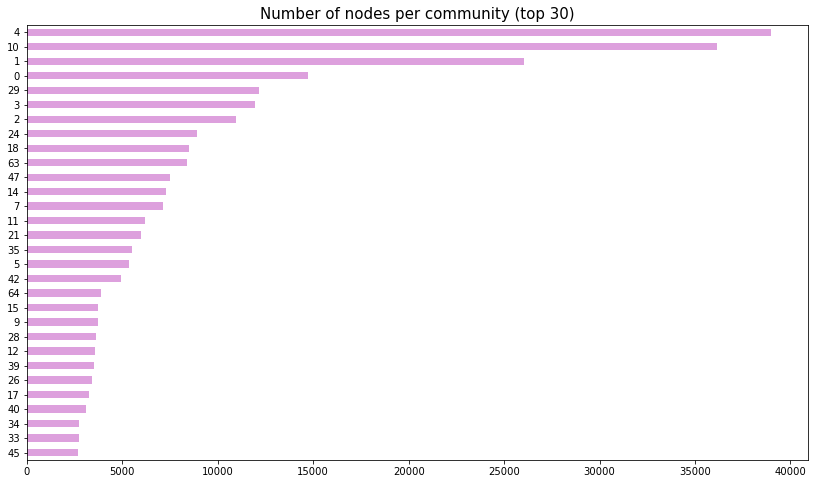

In [61]:
communities = []
for i in out_2_louvain["best_part"]:
    communities.append(out_2_louvain["best_part"].get(i))
val = pd.Series(communities).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='plum', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of nodes per community (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

### Network Community 5

In [ ]:
nt_5 = pd.read_csv(path + "nt_5.csv", low_memory=False, lineterminator='\n')

#### Info

#### Louvain

#### Communities

### Network Community 19

In [54]:
nt_19 = pd.read_csv(path + "nt_19.csv", low_memory=False, lineterminator='\n')
out_19 = network_general(nt_19)
out_19_louvain = network_louvain(nt_19)

#### Info

In [56]:
print(out_19["info"])

Name: 
Type: DiGraph
Number of nodes: 75977
Number of edges: 102045
Average in degree:   1.3431
Average out degree:   1.3431


#### Louvain

In [57]:
print("Community with users")
z = 0
for i in out_19_louvain["best_part"]:
    if(z == 5):
        break
    z = z + 1
    print(i)
    print(out_19_louvain["best_part"].get(i))

Community with users
IAmTonyaNash
0
CDCgov
1
JamieNeill12
1
Kennybestnz
2
WHO
3


#### Communities

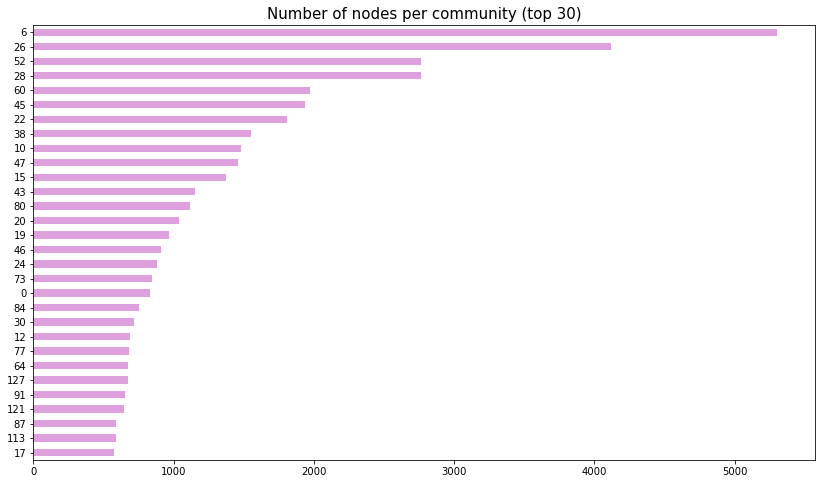

In [60]:
communities = []
for i in out_19_louvain["best_part"]:
    communities.append(out_19_louvain["best_part"].get(i))
val = pd.Series(communities).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='plum', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of nodes per community (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()